# Letter Recognition Using SVM

Let's now tackle a slightly more complex problem - letter recognition. We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.


## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [24]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df=pd.read_csv("letter-recognition.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.shape

(20000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [129]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

##### A quirky bug: the column names have a space, e.g. 'xbox ', which throws and error when indexed

In [12]:
print(df.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [17]:
df.rename(columns={"xbox ":"xbox"},inplace=True)

In [19]:
df.columns

Index(['letter', 'xbox', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

## Alternate way

In [20]:
 df.columns=['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [23]:
df[['letter', 'xbox', 'ybox','width', 'height']].head()

,letter,xbox,ybox,width,height
0,T,2,8,3,5
1,I,5,12,3,7
2,D,4,11,6,8
3,N,7,11,6,6
4,G,2,1,3,1


- **Here letter "T","I" has more height and "D",'N' has more width**

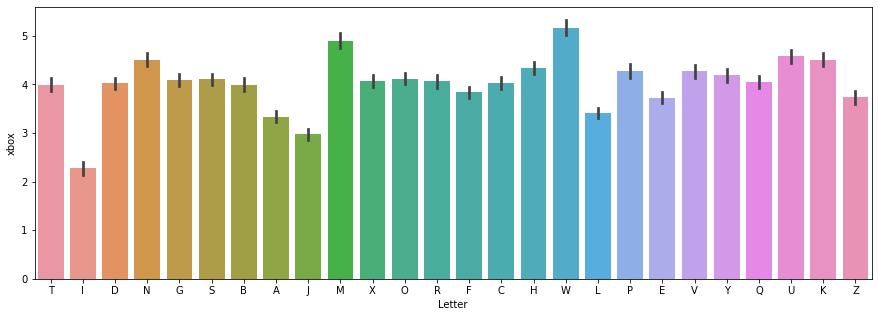

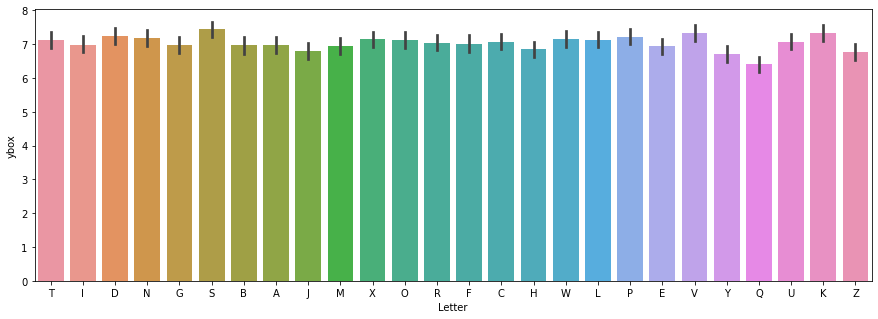

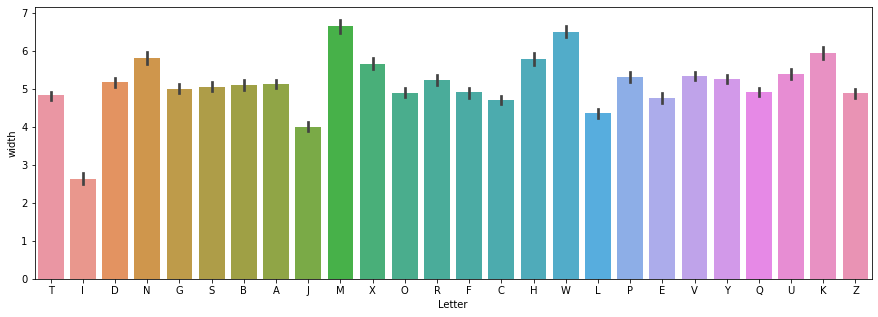

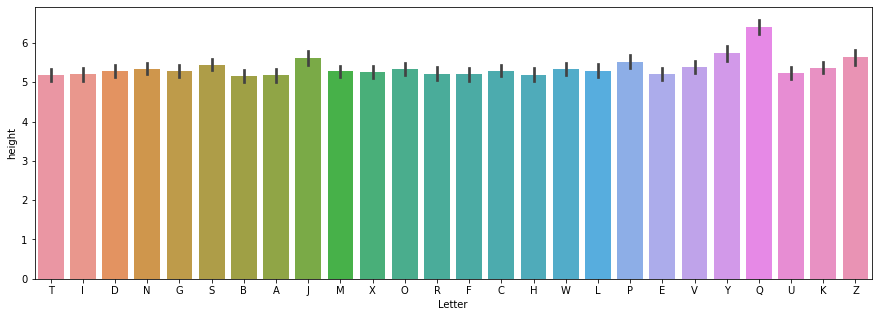

In [37]:
cols=['xbox', 'ybox','width', 'height']

def graphs():
    for i in cols:
        plt.figure(figsize=(15,5))
        sns.barplot(x="letter",y=i,data=df)
        plt.xlabel("Letter")
        plt.ylabel(i)
        plt.show()
graphs()

In [41]:
df["letter"].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [42]:
len(df["letter"].unique())

26

### let check mean of every letter

In [43]:
letter_mean=df.groupby("letter").mean()
letter_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


### Checking relations

In [44]:
df.corr()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


<AxesSubplot:>

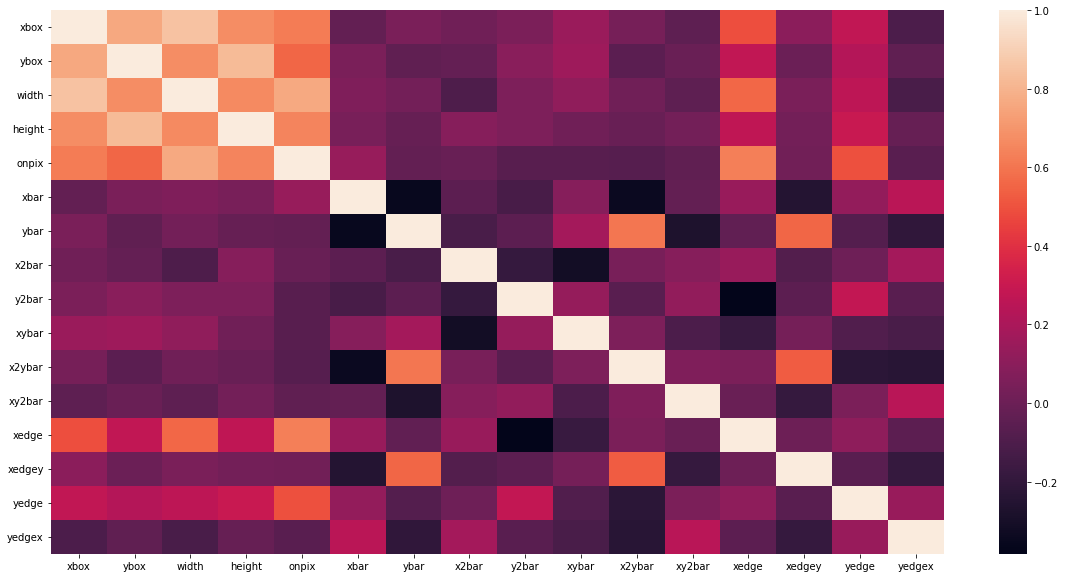

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [69]:
def cor_func(dt,thres):
    col=set()
    col_mat=dt.corr()
    for i in range(len(col_mat.columns)):
        for j in range(i):
            if abs(col_mat.iloc[i,j]) > thres:
                cols=col_mat.columns[i]
                col.add(cols)
    return col

In [71]:
cor_func(df,.50)

{'height', 'onpix', 'width', 'x2ybar', 'xedge', 'xedgey', 'ybox'}

In [75]:
# average feature values
round(df.drop('letter', axis=1).mean(), 2)
# this will fetch all the mean except for column "Letter"

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [78]:
# splitting into X and y
X = df.drop("letter", axis = 1)
y = df['letter']

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [81]:
# scaling the features
X_scaled = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [89]:
model_linear=SVC(kernel="linear")
model1=model_linear.fit(X_train,y_train)

In [91]:
y_pred=model1.predict(X_test)

In [92]:
# Checking accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [95]:
print("accuracy is {}".format(accuracy_score(y_pred,y_test)))

accuracy is 0.8523333333333334


## Using RBF Kernel

In [97]:
model_nonlinear=SVC(kernel="rbf")
model2=model_nonlinear.fit(X_train,y_train)
y_pred1=model2.predict(X_test)

In [98]:
print("accuracy is {}".format(accuracy_score(y_pred1,y_test)))

accuracy is 0.9383333333333334


## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [106]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold,GridSearchCV
folds=KFold(n_splits=5,shuffle=True,random_state=10)

# specify range of hyperparameters
# Set the parameters by cross-validation
param={"C":[1,10,100],
       "gamma":[1e-2, 1e-3, 1e-4]}


# specify model
model3=SVC(kernel="rbf")

# set up GridSearchCV()
src_bst=GridSearchCV(estimator=model3,param_grid=param,scoring="accuracy",cv=folds,verbose=2,return_train_score=True)

# fit the model
src_bst.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=1, gamma=0.01, total=   8.3s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV] .................................. C=1, gamma=0.01, total=   8.2s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   7.8s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   8.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   8.1s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=  14.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=  14.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=  14.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 16.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [107]:
## best parameter
src_bst.best_params_

{'C': 100, 'gamma': 0.01}

In [111]:
cv_result=pd.DataFrame(src_bst.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.286335,0.145581,2.781623,0.097450,1,0.01,"{'C': 1, 'gamma': 0.01}",0.830714,0.829286,0.831071,...,0.832714,0.004082,4,0.845268,0.844196,0.843304,0.845179,0.844911,0.844571,0.000737
1,10.818242,0.236406,3.514021,0.089792,1,0.001,"{'C': 1, 'gamma': 0.001}",0.666786,0.680357,0.684286,...,0.676500,0.007611,8,0.685089,0.683393,0.678661,0.680982,0.684286,0.682482,0.002355
2,20.849320,0.239576,3.519553,0.048176,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.212857,0.200714,0.185000,...,0.210071,0.016454,9,0.231339,0.220446,0.202589,0.241071,0.237679,0.226625,0.013921
3,3.257987,0.053864,1.830705,0.040312,10,0.01,"{'C': 10, 'gamma': 0.01}",0.904286,0.907857,0.911786,...,0.910214,0.003653,2,0.929286,0.929554,0.930446,0.926518,0.930446,0.929250,0.001444
4,5.063766,0.031120,2.646407,0.063912,10,0.001,"{'C': 10, 'gamma': 0.001}",0.805357,0.810357,0.811786,...,0.810929,0.004223,5,0.817857,0.818214,0.815625,0.818393,0.815357,0.817089,0.001319


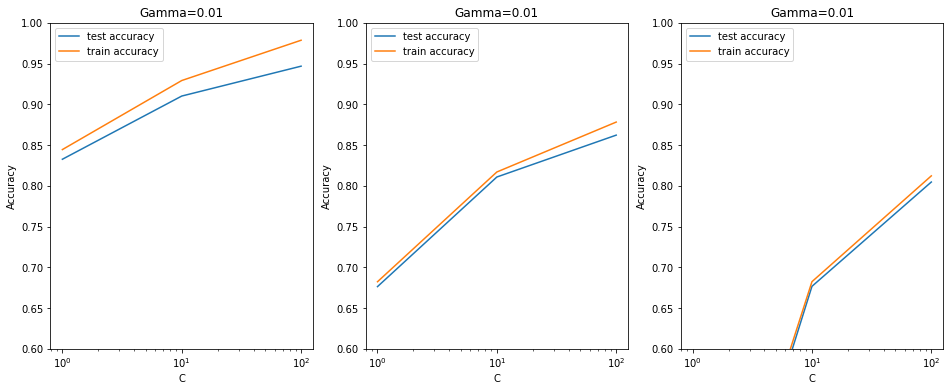

In [124]:
# converting C to numeric type for plotting on x-axis
cv_result["param_C"]=cv_result["param_C"].astype("int")
# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3 for gamma=.01
plt.subplot(131)
gamma_01=cv_result[cv_result["param_gamma"]==.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.01")
plt.ylim([.60,1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3 for gamma=.001

plt.subplot(132)
gamma_01=cv_result[cv_result["param_gamma"]==.001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.01")
plt.ylim([.60,1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3 for gamma=.0001

plt.subplot(133)
gamma_01=cv_result[cv_result["param_gamma"]==.0001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Gamma=0.01")
plt.ylim([.60,1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [125]:
# printing the optimal accuracy score and hyperparameters
best_score = src_bst.best_score_
best_hyperparams = src_bst.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9468571428571428 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [127]:
from sklearn import metrics

In [128]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9508333333333333 

[[206   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 206   0   2   0   0   0   0   0   0   0   0   0   1   0   0   0   5
    2   0   0   1   0   1   0   0]
 [  0   0 218   0   3   0   5   1   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 240   0   1   1   1   0   0   0   0   0   2   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   3   0 219   1   6   0   0   0   0   2   0   0   0   0   0   0
    1   0   0   0   0   1   0   1]
 [  0   0   0   2   0 215   0   2   1   0   0   0   0   0   0   2   0   0
    1   2   0   0   0   0   0   0]
 [  0   0   3   1   1   1 206   0   0   0   0   1   1   0   0   0   1   1
    0   0   0   1   2   0   0   0]
 [  0   3   2   4   0   1   2 188   0   0   1   1   1   0   2   0   4   7
    0   0   0   0   0   0   1   0]
 [  0   0   0   1   0   1   0   0 202  10   0   0   0   0   0   0   0   0
    0   0   0   0   0   

## Conclusion

The accuracy achieved using a non-linear kernel (~0.95) is mush higher than that of a linear one (~0.85). We can conclude that the problem is highly non-linear in nature.